In [ ]:
%matplotlib inline
from pylab import *
from sci378.stats import *

Version:  0.0.42


## Best Estimate, $\mu$, knowing $\sigma$

In [ ]:
def logprior(μ):
    value=0
    
    value+=logNormal(μ,0,100)
    
    return value

def loglikelihood(data,μ):
    x=data
    
    value=0
        
    value+=logNormal(x-μ,0,σ)
    return value
    

In [ ]:
data=array([12.0,14,16])
σ=1

In [ ]:
model=MCMCModel(data,loglikelihood,logprior)   

Sampling Prior...
Done.
0.17 s
Running MCMC 1/3...
Done.
0.70 s
Running MCMC 2/3...
Done.
0.69 s
Running MCMC 3/3...
Done.
0.69 s


<Figure size 1000x800 with 0 Axes>

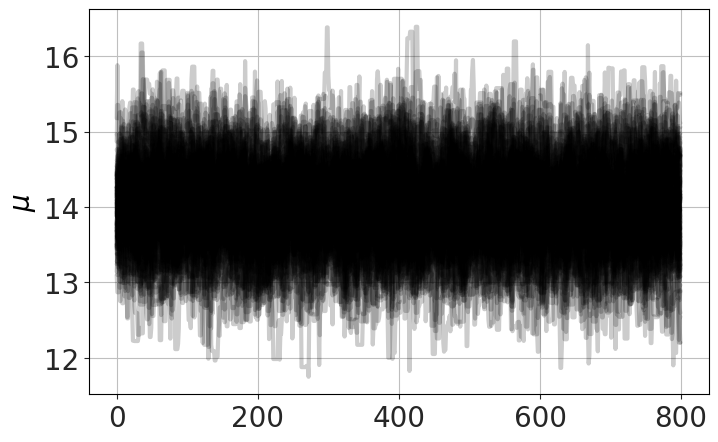

In [ ]:
model.run_mcmc(800,repeat=3,verbose=True)
model.plot_chains()

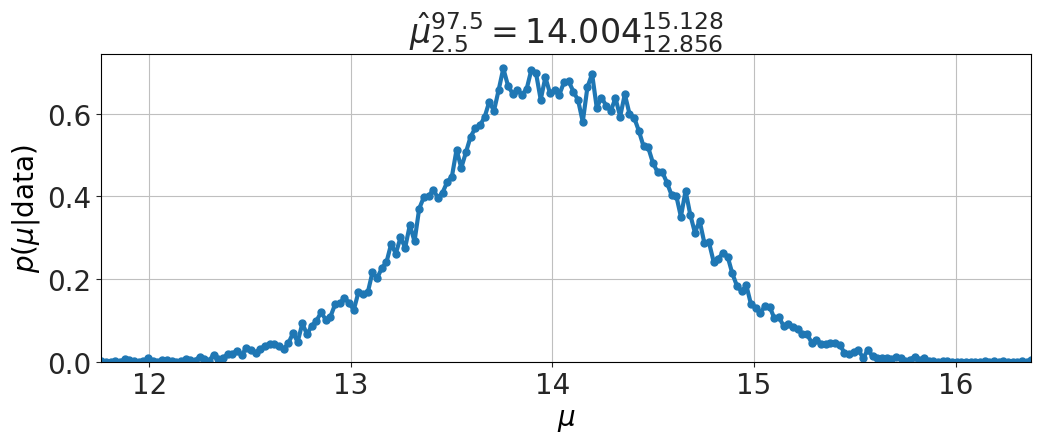

In [ ]:
model.plot_distributions()

In [ ]:
model.P("μ>15")

0.0405

## Best Estimate, $\mu$, not knowing $\sigma$

In [ ]:
def logprior(μ,σ):
    value=0
    
    value+=logNormal(μ,0,100)
    value+=logJeffreys(σ)
    
    return value

def loglikelihood(data,μ,σ):
    x=data
    
    value=0
        
    value+=logNormal(x-μ,0,σ)
    return value
    

Sampling Prior...
Done.
0.23 s
Running MCMC 1/3...
Done.
0.76 s
Running MCMC 2/3...
Done.
0.77 s
Running MCMC 3/3...
Done.
0.78 s


<Figure size 1000x800 with 0 Axes>

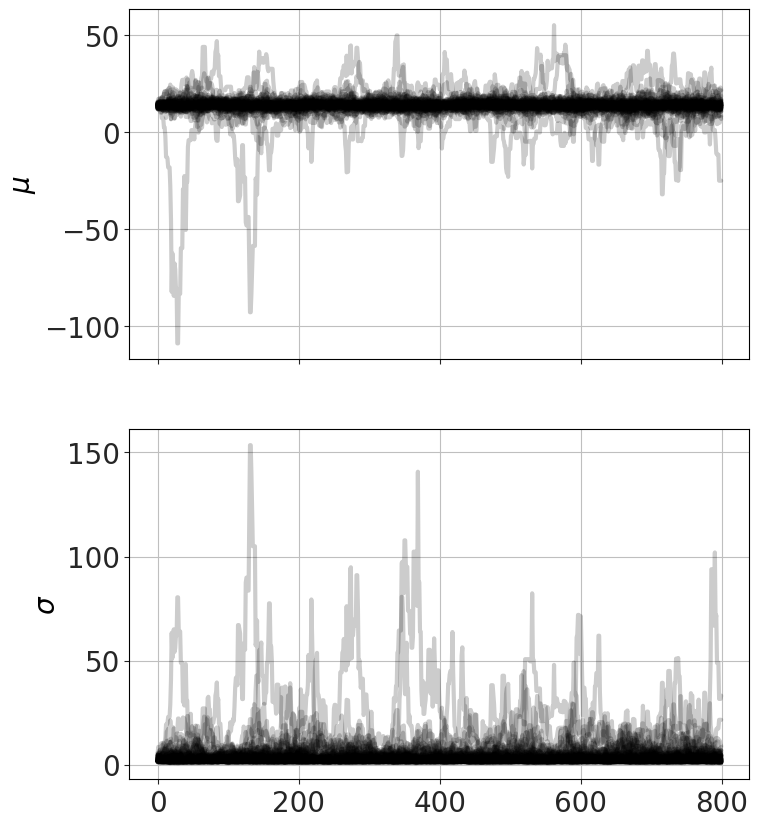

In [ ]:
model=MCMCModel(data,loglikelihood,logprior)   
model.run_mcmc(800,repeat=3,verbose=True)
model.plot_chains()

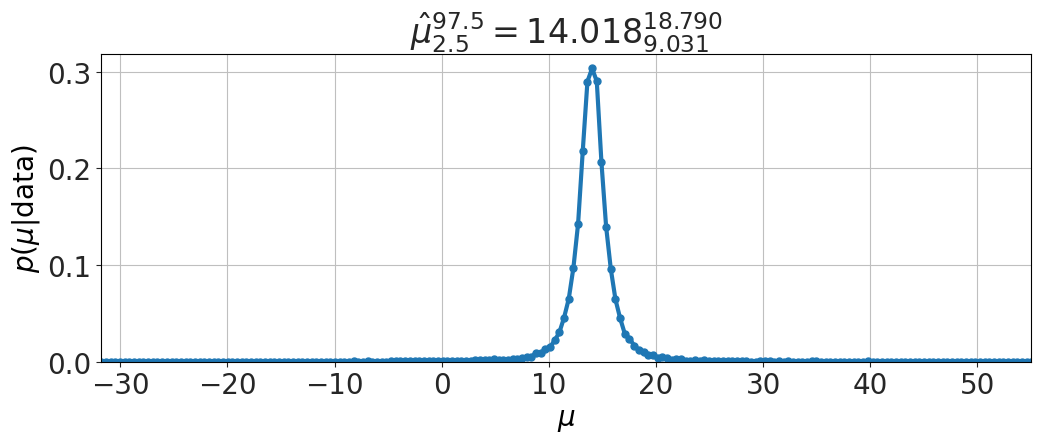

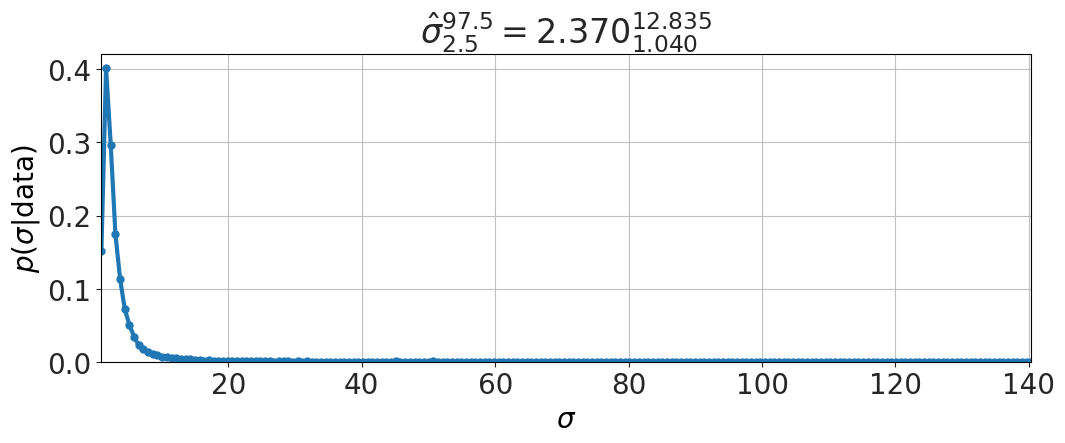

In [ ]:
model.plot_distributions()

In [ ]:
model.P("μ>15")

0.2361

In [ ]:
model.P("σ<1")

0.018616666666666667

## Proportion

In [ ]:
def logprior(θ):
    value=0
    
    value+=logUniform(θ,0,1)
    
    return value

def loglikelihood(data,θ):
    h,N=data
    
    value=0
        
    value+=logBernoulli(θ,h,N)
    return value
    

Sampling Prior...
Done.
0.12 s
Running MCMC 1/3...
Done.
0.38 s
Running MCMC 2/3...
Done.
0.38 s
Running MCMC 3/3...
Done.
0.39 s


<Figure size 1000x800 with 0 Axes>

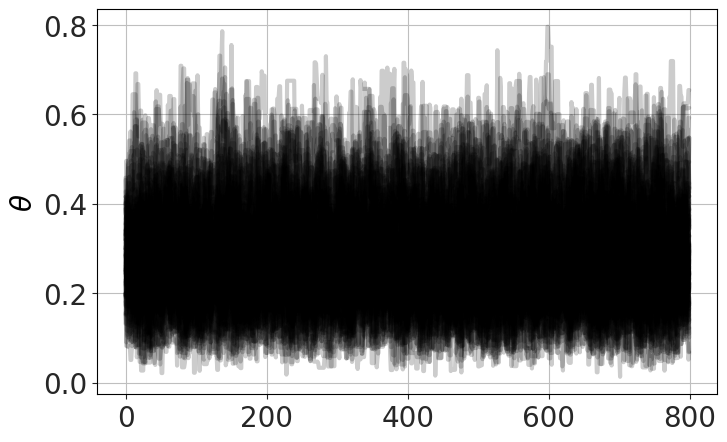

In [ ]:
data=3,12

model=MCMCModel(data,loglikelihood,logprior)   
model.run_mcmc(800,repeat=3,verbose=True)
model.plot_chains()

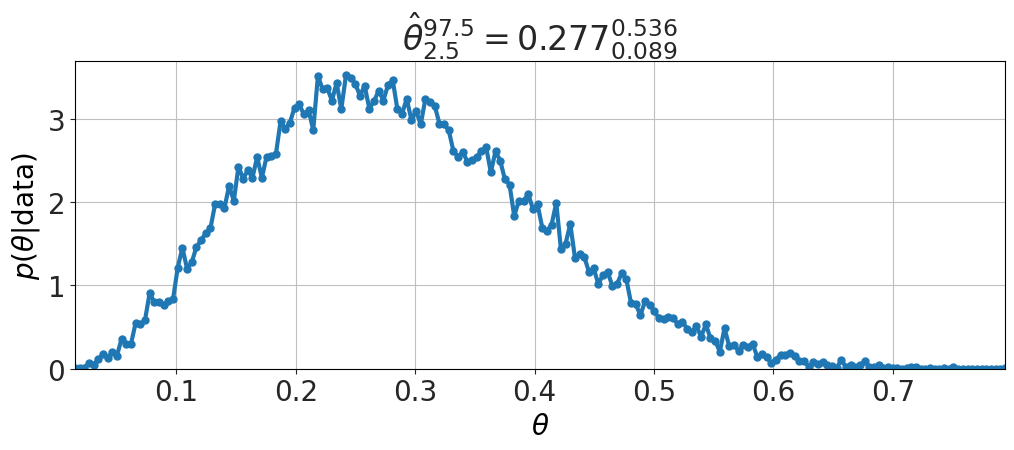

In [ ]:
model.plot_distributions()

In [ ]:
model.P("θ<0.5")

0.9544166666666667

## Cauchy

In [ ]:
data=array([12.0,14,16])

In [ ]:
def logprior(x_o,γ):
    value=0
    
    value+=logNormal(x_o,0,100)
    value+=logJeffreys(γ)
    
    return value

def loglikelihood(data,x_o,γ):
    x=data
    
    value=0
        
    value+=logCauchy(x-x_o,0,γ)
    return value
    

Sampling Prior...
Done.
0.23 s
Running MCMC 1/3...
Done.
0.78 s
Running MCMC 2/3...
Done.
0.78 s
Running MCMC 3/3...
Done.
0.78 s


<Figure size 1000x800 with 0 Axes>

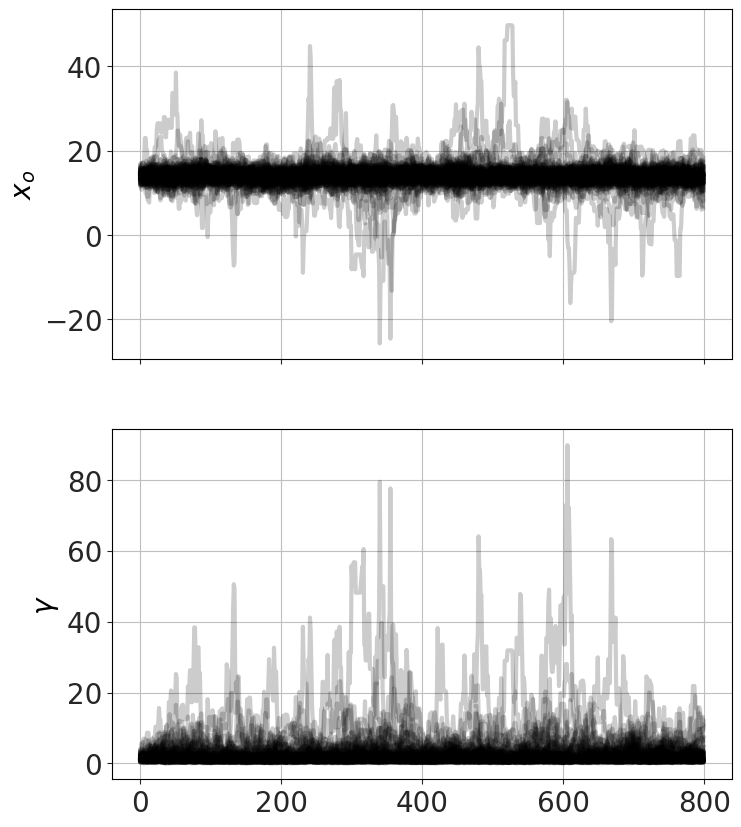

In [ ]:
model=MCMCModel(data,loglikelihood,logprior)   
model.run_mcmc(800,repeat=3,verbose=True)
model.plot_chains()

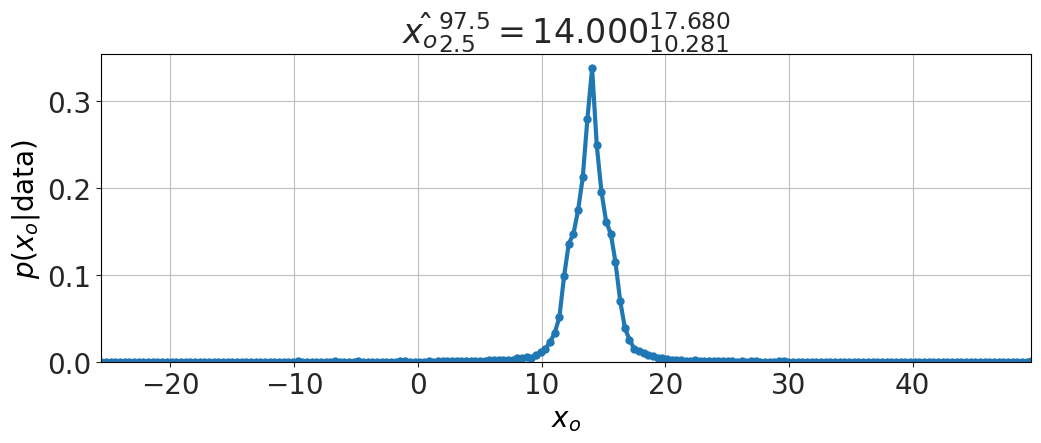

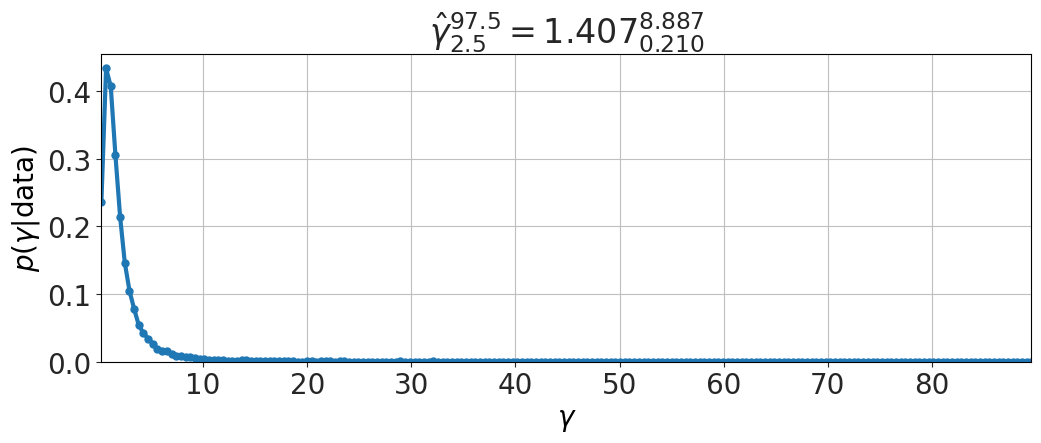

In [ ]:
model.plot_distributions()

In [ ]:
model.P("x_o>15")

0.24745

## BEST Test

In [ ]:
group_a=[161.05, 157.94, 164.18, 163.54, 160.07, 163.46, 
         168.08, 165.58, 164.61, 162.37, 160.85, 159.48, 
         160.31, 161.95, 163.24, 161.4, 162.66, 163.55, 
         160.47, 159.17, 164.71, 161.73, 159.57, 162.96, 158.41]

group_b=[158.51, 155.79, 159.58, 161.68, 155.75, 158.06, 
         159.64, 168.26, 162.87, 156.98, 157.6, 159.35, 
         159.11, 155.99, 155.76, 152.08, 158.77, 155.19, 
         165.59, 156.95, 159.46, 160.89, 158.78, 156.59, 155.98]

In [ ]:
def logprior(μ1,σ1,μ2,σ2,ν):
    value=0
    
    value+=logNormal(μ1,0,100)  # wide prior on μ1
    value+=logJeffreys(σ1)
    value+=logNormal(μ2,0,100)
    value+=logJeffreys(σ2)
    value+=logExponential(ν-1,29)  # large ν = Normal, small ν = outliery
    
    return value

def loglikelihood(data,μ1,σ1,μ2,σ2,ν):
    x,y=data
    value=0
        
    value+=logStudent_T(x-μ1,ν,0,σ1)
    value+=logStudent_T(y-μ2,ν,0,σ2)
    
    return value

Sampling Prior...
Done.
0.40 s
Running MCMC 1/2...
Done.
3.91 s
Running MCMC 2/2...
Done.
4.11 s


<Figure size 1000x800 with 0 Axes>

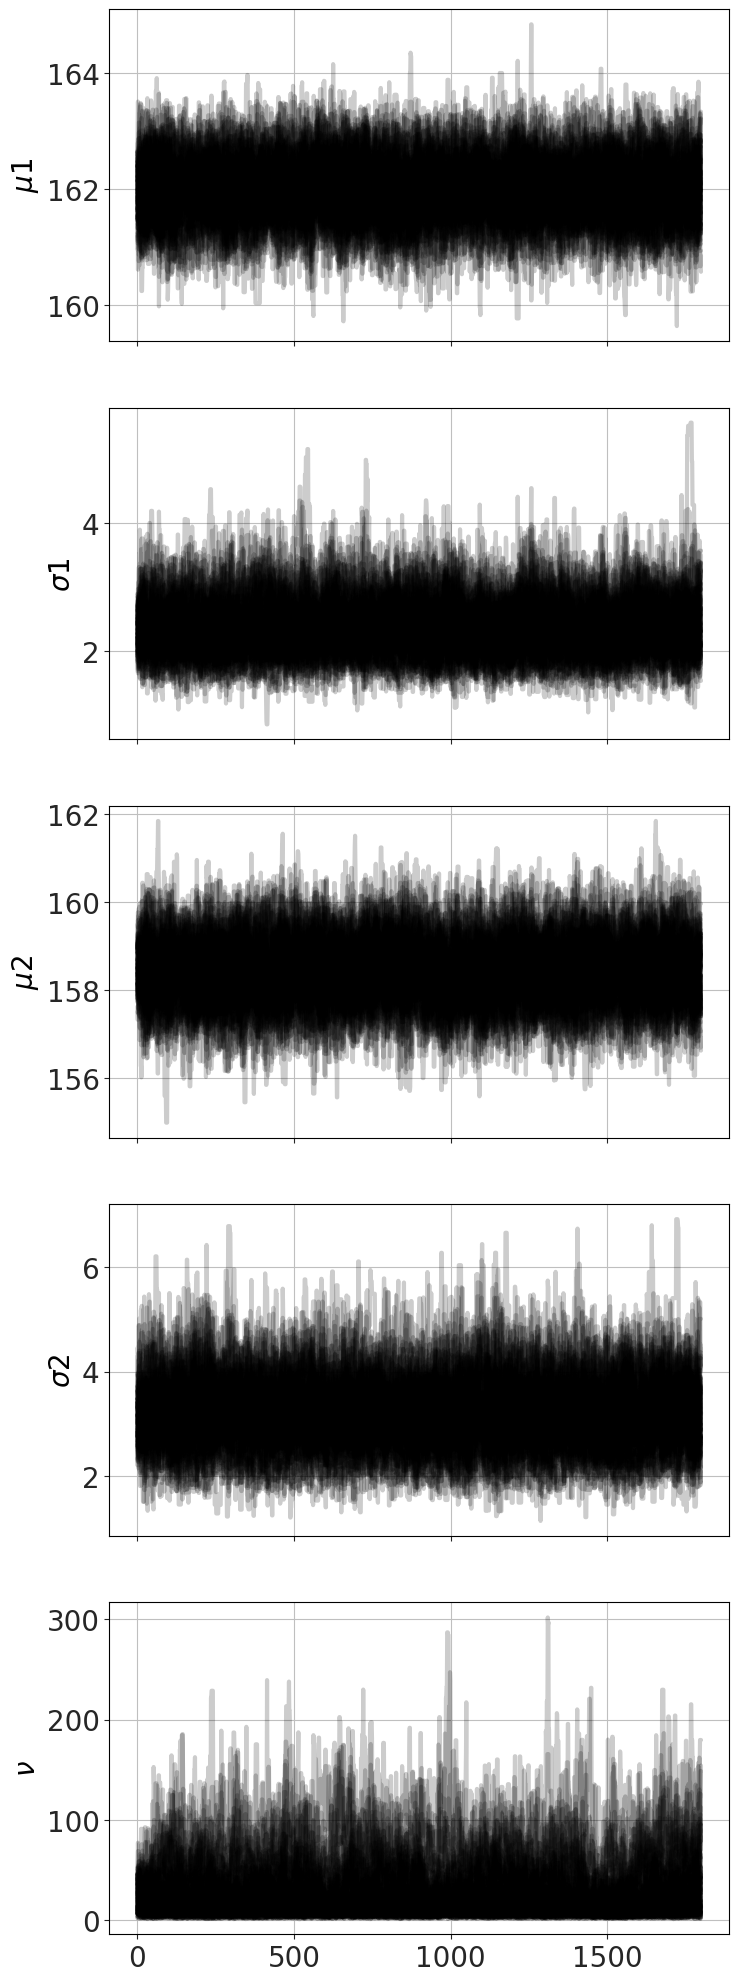

In [ ]:
model=MCMCModel((group_a,group_b),loglikelihood,logprior)
model.run_mcmc(1800,repeat=2,verbose=True)
model.plot_chains()

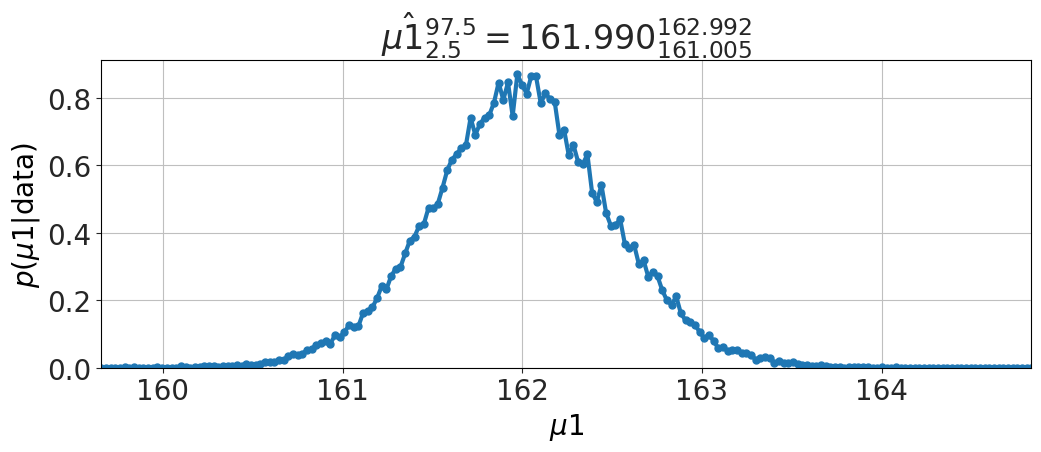

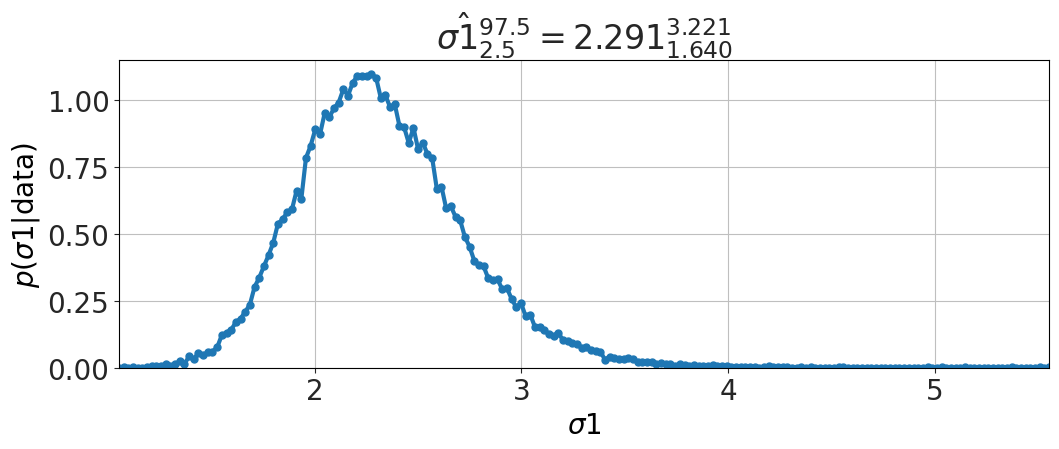

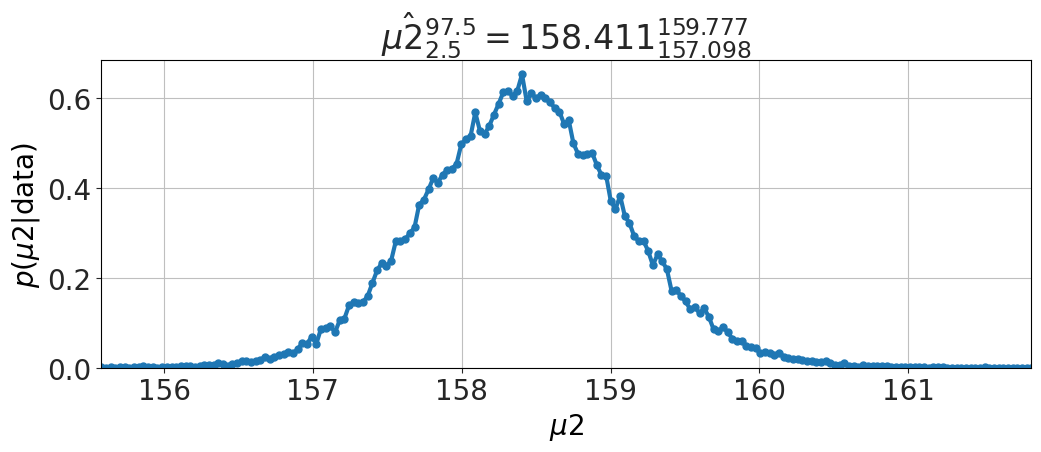

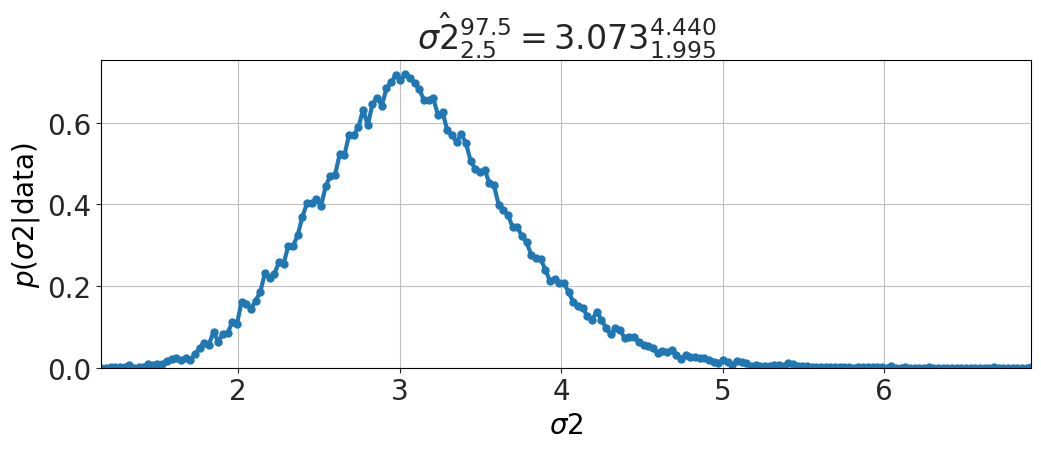

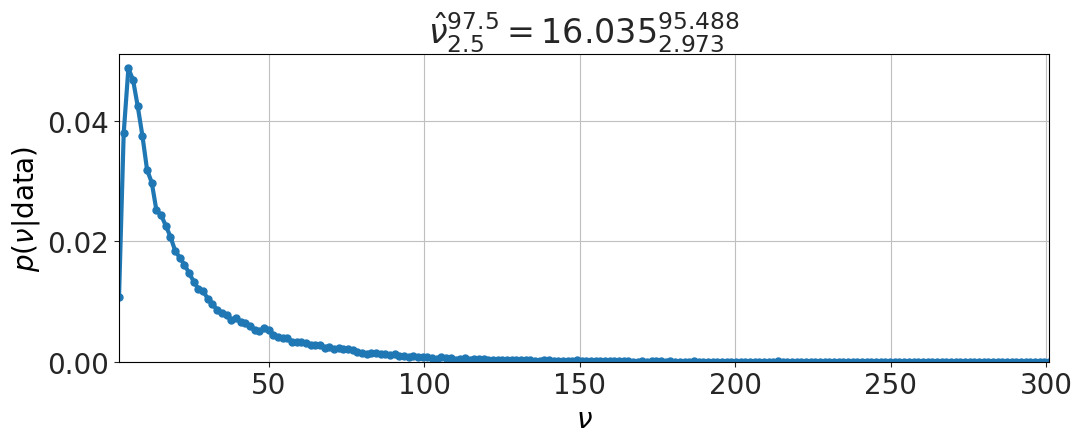

In [ ]:
model.plot_distributions()

In [ ]:
model.P('μ1<μ2')   # μ1 is larger than μ2

5.185185185185185e-05

In [ ]:
model.best_estimates()

{'μ1': array([161.50615368, 161.98992188, 162.48564204]),
 'σ1': array([1.94446803, 2.29133619, 2.70619499]),
 'μ2': array([157.74962722, 158.41111024, 159.07760884]),
 'σ2': array([2.50772523, 3.0732299 , 3.70280442]),
 'ν': array([ 5.95522223, 16.03517829, 44.51899527])}

## Linear Regression

In [ ]:
x1,y1=(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
    array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
        4.82,  5.68])
      )

x2,y2=(
       array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
    array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74])
)

x3,y3=(
    array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
    array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
        6.42,  5.73])
)

x4,y4=(
    array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]),
    array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
        7.91,  6.89])
)

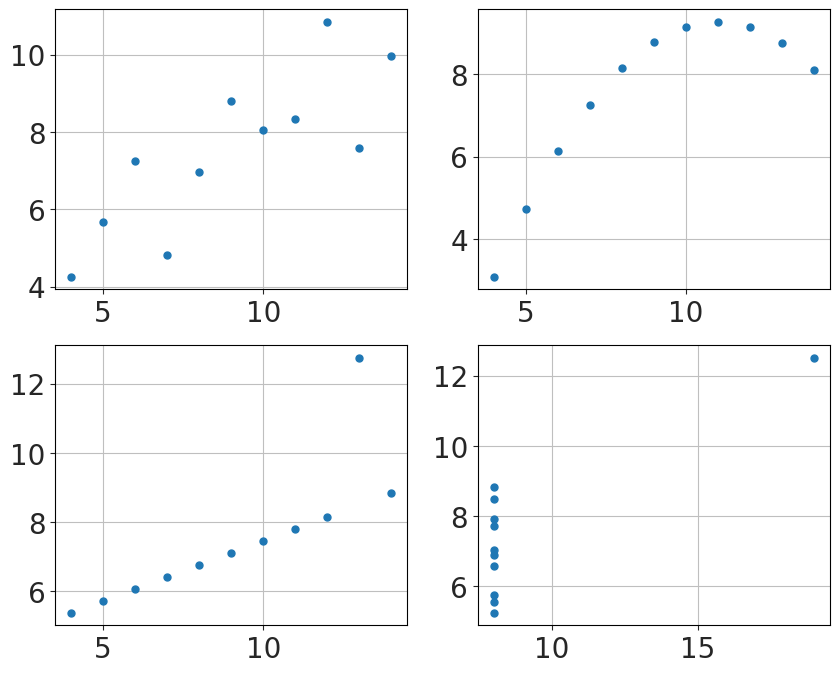

In [ ]:
for i,(x,y) in enumerate(((x1,y1),(x2,y2),(x3,y3),(x4,y4))):
    subplot(2,2,i+1)
    plot(x,y,'o')

In [ ]:
def linear(x,m=1,b=1):
    return m*x+b

def logprior(m,b,σ):
    value=0
    
    value+=logNormal(m,0,100)
    value+=logJeffreys(σ)
    value+=logNormal(b,0,100)
    
    return value

def loglikelihood(data,m,b,σ):
    x,y=data
    y_predict=linear(x,m,b)
    
    value=0
        
    value+=logNormal(y-y_predict,0,σ)
    
    return value

In [ ]:
from lmfit import Model,Parameter

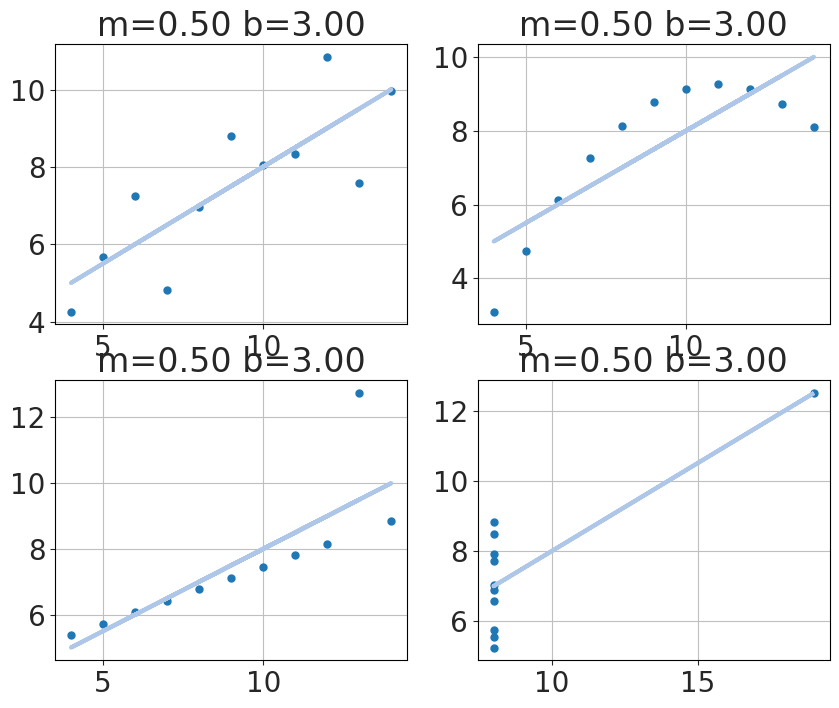

In [ ]:
for i,(x,y) in enumerate(((x1,y1),(x2,y2),(x3,y3),(x4,y4))):
    subplot(2,2,i+1)
    plot(x,y,'o')
    mymodel=linear_model=Model(linear)  # from lmfit  # make sure to call it mymodel
    params=mymodel.make_params()
    params['m']=Parameter("m",min=0,value=0.5)
    result=mymodel.fit(y,params,x=x)
    
    title(f"m={result.values['m']:.2f} b={result.values['b']:.2f}")
    
    plot(x, result.best_fit,'-')


[....]


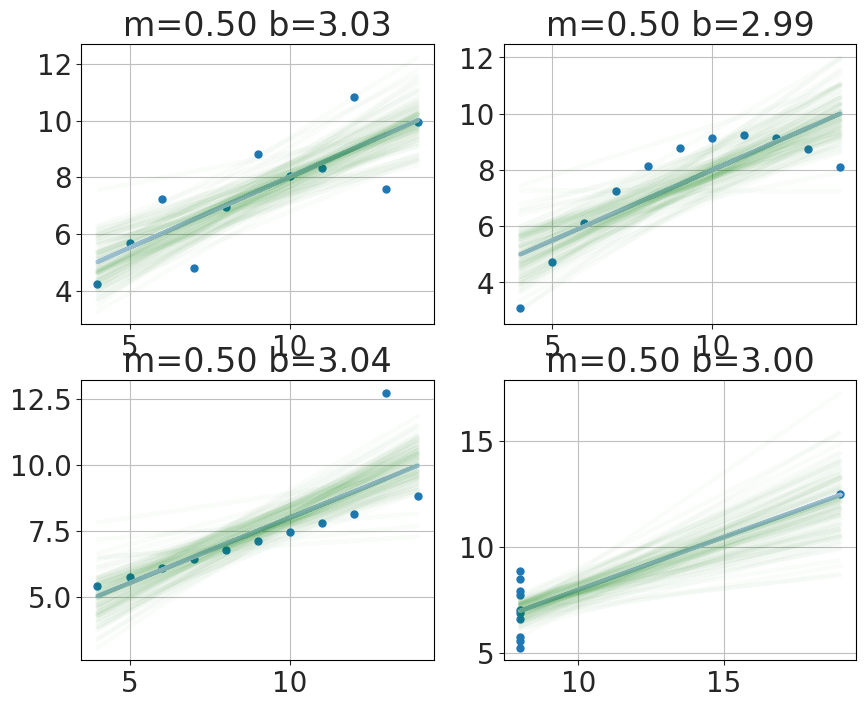

In [ ]:
print("[",end="")
for i,(x,y) in enumerate(((x1,y1),(x2,y2),(x3,y3),(x4,y4))):
    print(".",end="")
    subplot(2,2,i+1)
    plot(x,y,'o')
    
    model=MCMCModel((x,y),loglikelihood,logprior)
    model.run_mcmc(800,repeat=3,verbose=False)

    m,b=model.best_estimates('m')['m'][1][0],model.best_estimates('b')['b'][1][0]
    
    plot(x,linear(x,m,b),'-')
    title(f"m={m:.2f} b={b:.2f}")
    
    for sample in model.random_sample(100):
        m,b,σ=sample
        plot(x,linear(x,m,b),'g-',alpha=0.02)
        
print("]")
        

### robust regression

In [ ]:
def logprior(m,b,σ,ν):
    value=0
    
    value+=logNormal(m,0,100)
    value+=logJeffreys(σ)
    value+=logNormal(b,0,100)
    value+=logExponential(ν-1,29)  # large ν = Normal, small ν = outliery
    
    
    return value

def loglikelihood(data,m,b,σ,ν):
    x,y=data
    y_predict=linear(x,m,b)
    
    value=0
        
    value+=logStudent_T(y-y_predict,ν,0,σ)
    
    return value
    

[....]


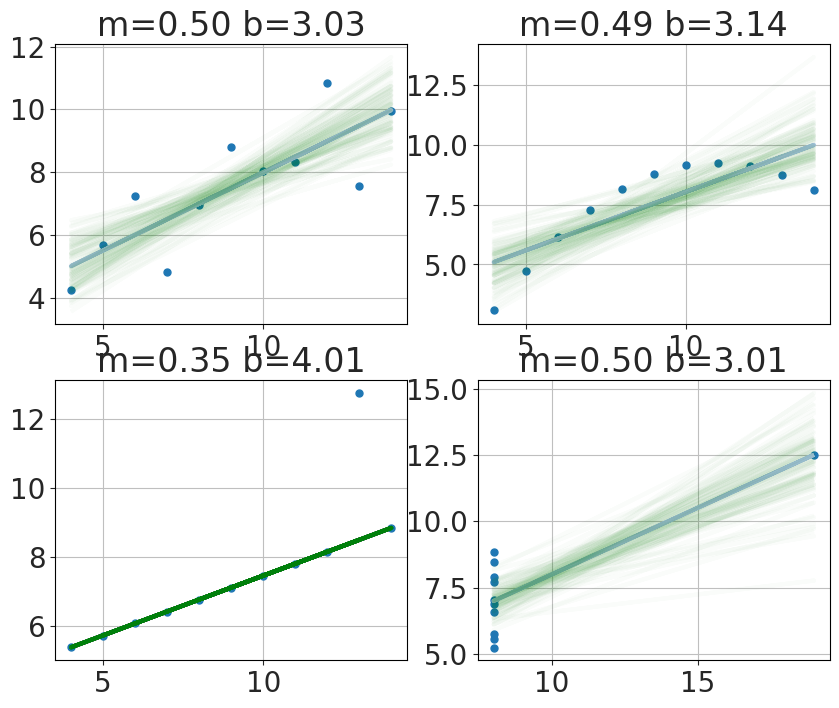

In [ ]:
print("[",end="")
for i,(x,y) in enumerate(((x1,y1),(x2,y2),(x3,y3),(x4,y4))):
    print(".",end="")
    subplot(2,2,i+1)
    plot(x,y,'o')
    
    model=MCMCModel((x,y),loglikelihood,logprior)
    model.run_mcmc(800,repeat=3,verbose=False)

    m,b=model.best_estimates('m')['m'][1][0],model.best_estimates('b')['b'][1][0]
    
    plot(x,linear(x,m,b),'-')
    title(f"m={m:.2f} b={b:.2f}")
    
    for sample in model.random_sample(100):
        m,b,σ,ν=sample
        plot(x,linear(x,m,b),'g-',alpha=0.02)
        
print("]")
        

### robust quadratic regression

In [ ]:
def quadratic(x,a=1,b=1,c=1):
    return a*x**2+b*x+c


def logprior(a,b,c,σ,ν):
    value=0
    
    value+=logNormal(m,0,100)
    value+=logJeffreys(σ)
    value+=logNormal(b,0,100)
    value+=logExponential(ν-1,29)  # large ν = Normal, small ν = outliery
    
    
    return value

def loglikelihood(data,a,b,c,σ,ν):
    x,y=data
    y_predict=quadratic(x,a,b,c)
    
    value=0
        
    value+=logStudent_T(y-y_predict,ν,0,σ)
    
    return value
    

[....]


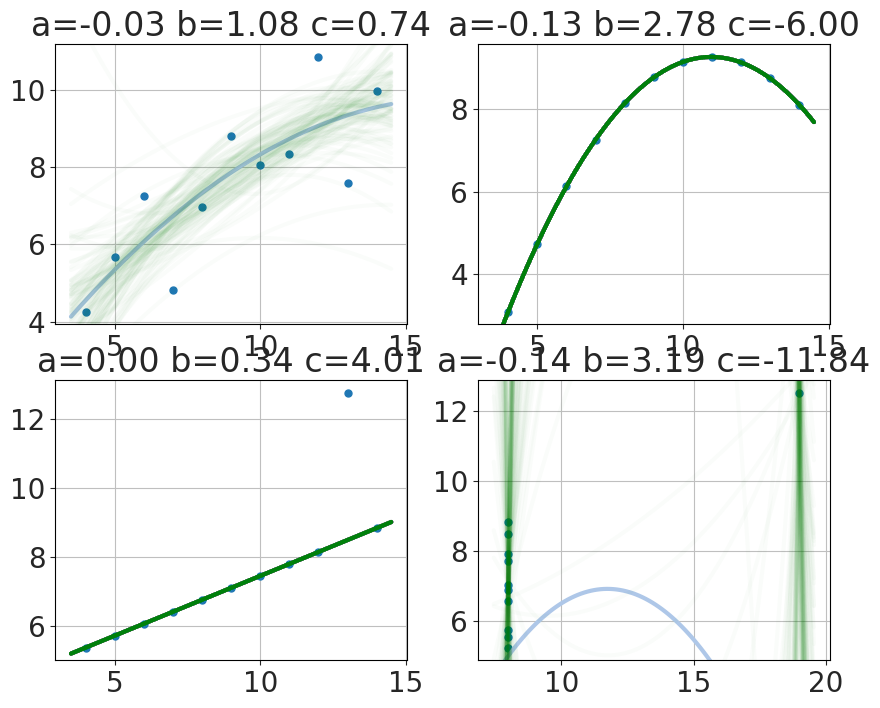

In [ ]:
print("[",end="")
for i,(x,y) in enumerate(((x1,y1),(x2,y2),(x3,y3),(x4,y4))):
    print(".",end="")
    subplot(2,2,i+1)
    plot(x,y,'o')
    
    model=MCMCModel((x,y),loglikelihood,logprior)
    model.run_mcmc(800,repeat=3,verbose=False)

    a,b,c=model.best_estimates('a')['a'][1][0],model.best_estimates('b')['b'][1][0],model.best_estimates('c')['c'][1][0]
    
    xl=gca().get_xlim()
    yl=gca().get_ylim()
    xx=linspace(xl[0],xl[1],100)
    plot(xx,quadratic(xx,a,b,c),'-')
    title(f"a={a:.2f} b={b:.2f} c={c:.2f}")
    
    for sample in model.random_sample(100):
        a,b,c,σ,ν=sample
        plot(xx,quadratic(xx,a,b,c),'g-',alpha=0.02)
        
        
    gca().set_ylim(yl)
print("]")
        